# Check distribution of sic values cutoff: 
  
Katie Brennan  
September 2021  

  
Response to Revisions 2

In [1]:
import sys
import numpy as np
import pickle
import pandas as pd
import sys

from scipy import stats
from scipy import signal

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point

In [2]:
# sys.path.insert(1,'/home/disk/p/mkb22/Documents/si_analysis_kb/instrumental_assimilation_experiments/')
# import reanalysis_recons_utils as rrutils

sys.path.insert(1,'/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/')
import commonera_utils as ce_utils 

In [3]:
def load_ccsm4_lm_regridded():
    ccsm4_dir = '/home/disk/chaos/mkb22/Documents/SeaIceData/CCSM4/CCSM4_last_millennium/'
    ccsm4_file = 'ccsm4_sic_sit_tas_20CRv2_850_1850_full.npz'

    ccsm4_lm = np.load(ccsm4_dir+ccsm4_file)

    ccsm4_truth_sic = ccsm4_lm['sic_ccsm4']
    ccsm4_truth_sit = ccsm4_lm['sit_ccsm4']
    ccsm4_truth_tas = ccsm4_lm['tas_ccsm4']
    ccsm4_truth_lat = ccsm4_lm['lat_ccsm4']
    ccsm4_truth_lon = ccsm4_lm['lon_ccsm4']
    
    return ccsm4_truth_tas, ccsm4_truth_sic, ccsm4_truth_sit, ccsm4_truth_lat, ccsm4_truth_lon

In [4]:
def sub_arctic_plot(fig,ax,VAR1,LAT,LON,TITLE1,MAX1,colorbar=True,extent=True):
    var1, lon1 = add_cyclic_point(VAR1, coord=LON)
    new_lon2d, new_lat2d = np.meshgrid(lon1, LAT)
    if extent is True: 
        ax.set_extent([-150, 140, 50, 90], crs=ccrs.PlateCarree())
    ax.gridlines(linestyle='--')
    ax.add_feature(cfeature.LAND, facecolor=(1,1,1))
    cs = ax.pcolormesh(new_lon2d, new_lat2d, var1, 
                       vmin=-MAX1, vmax=MAX1, cmap=plt.cm.RdBu_r, 
                       transform=ccrs.PlateCarree())
    ax.coastlines(resolution='110m', linewidth=0.5)
    if colorbar is True:
        plt.colorbar(cs, ax=ax)
    ax.set_title(TITLE1)
    
    return cs

In [5]:
proj = dict(projection=ccrs.Stereographic(central_latitude=90,
                                          central_longitude=-45,
                                          true_scale_latitude=0.1))

In [6]:
plt.rcParams['figure.dpi']=200

## Load reconstruction: 

In [7]:
pkeys = ['p0', 'p_1', 'p_5', 'p_10', 'plow_1', 'plow_5', 'plow_10', 'p100', 
         'p101', 'p105', 'p110', 'phigh101', 'phigh105', 'phigh110']

In [8]:
## Finds mean percentiles in time for each iteration and puts them in an array: 

output_dir_ccsm4 = '/home/disk/p/mkb22/nobackup/LMR_output/common_era_experiments/experiments/ccsm4/'

niter = 10

cutoff_count_pos = np.zeros((niter))
cutoff_count_neg = np.zeros((niter))
percentiles = {}
percentiles_all = {}
percent = {}

for i, it in enumerate(range(niter)):
    output_file_ccsm4 = ('sic_ccsm4_anrecon_revisions2_testcount2_0_2000_pages2kv2_inf2_6_loc15000_iter'+
                         str(it)+'.pkl')
    recon = pickle.load(open(output_dir_ccsm4+output_file_ccsm4,'rb'))

    cutoff_count_pos[i] = recon['cutoff_count_pos']
    cutoff_count_neg[i] = recon['cutoff_count_neg']
    
    percent[i] = recon['percentiles']
    
    for n,p in enumerate(pkeys):
#        print(p)
        if i is 0: 
            percentiles[p] = []
            percentiles_all[p] = []
            
        percentiles[p] = np.append(percentiles[p],np.nanmean(percent[i][p]))
        percentiles_all[p] = np.append(percentiles_all[p],percent[i][p])

In [9]:
output_dir_ccsm4 = '/home/disk/p/mkb22/nobackup/LMR_output/common_era_experiments/experiments/ccsm4/'
#output_file_ccsm4 = 'sic_ccsm4_anrecon_0_2000_pages2kv2_inf2_6_loc15000_iter0.pkl'
output_file_ccsm4 = 'sic_ccsm4_anrecon_revisions2_testcount2_0_2000_pages2kv2_inf2_6_loc15000_iter1.pkl'

niter = 1

recon = pickle.load(open(output_dir_ccsm4+output_file_ccsm4,'rb'))

In [10]:
sic_lalo = recon['sic_lalo']
tas_lalo = recon['tas_lalo']
sic_ens_var = recon['sic_ens_var']
nobs = recon['nobs']
sia_ens = recon['sia_ens']
sie_ens = recon['sie_ens']
recon_years = recon['recon_years']
Ye_assim = recon['Ye_assim']
Ye_assim_coords = recon['Ye_assim_coords']
Xb_inflate = recon['Xb_inflate']
proxy_assim_loc = recon['proxy_assim_loc']
percentiles = recon['percentiles']
cutoff_count_pos = recon['cutoff_count_pos']
cutoff_count_neg = recon['cutoff_count_neg']

In [11]:
print('Monte Carlo iteration ALL:\n')
print('Percentiles: only values > 100')
print('101% percentile: '+str(np.round(np.nanmean(percentiles_all['phigh101']),2))+' +/- '+str(np.round(np.std(percentiles_all['phigh101']),2)))
print('105% percentile: '+str(np.round(np.nanmean(percentiles_all['phigh105']),2))+' +/- '+str(np.round(np.std(percentiles_all['phigh105']),2)))
print('110% percentile: '+str(np.round(np.nanmean(percentiles_all['phigh110']),2))+' +/- '+str(np.round(np.std(percentiles_all['phigh110']),2))+'\n')

print('Percentiles: only values < 0')
print('-1% percentile: '+str(np.round(np.nanmean(percentiles_all['plow_1']),2))+' +/- '+str(np.round(np.std(percentiles_all['plow_1']),2)))
print('-5% percentile: '+str(np.round(np.nanmean(percentiles_all['plow_5']),2))+' +/- '+str(np.round(np.std(percentiles_all['plow_5']),2)))
print('-10% percentile: '+str(np.round(np.nanmean(percentiles_all['plow_10']),2))+' +/- '+str(np.round(np.std(percentiles_all['plow_10']),2))+'\n')

print('Percentiles: overall')
print('100% percentile: '+str(np.round(np.nanmean(percentiles_all['p100']),2))+' +/- '+str(np.round(np.std(percentiles_all['p100']),2)))
print('101% percentile: '+str(np.round(np.nanmean(percentiles_all['p101']),2))+' +/- '+str(np.round(np.std(percentiles_all['p101']),2)))
print('105% percentile: '+str(np.round(np.nanmean(percentiles_all['p105']),2))+' +/- '+str(np.round(np.std(percentiles_all['p105']),2)))
print('110% percentile: '+str(np.round(np.nanmean(percentiles_all['p110']),2))+' +/- '+str(np.round(np.std(percentiles_all['p110']),2))+'\n')

print('Percentiles: overall')
print('0% percentile: '+str(np.round(np.nanmean(percentiles_all['p0']),2))+' +/- '+str(np.round(np.std(percentiles_all['p0']),2)))
print('-1% percentile: '+str(np.round(np.nanmean(percentiles_all['p_1']),2))+' +/- '+str(np.round(np.std(percentiles_all['p_1']),2)))
print('-5% percentile: '+str(np.round(np.nanmean(percentiles_all['p_5']),2))+' +/- '+str(np.round(np.std(percentiles_all['p_5']),2)))
print('-10% percentile: '+str(np.round(np.nanmean(percentiles_all['p_10']),2))+' +/- '+str(np.round(np.std(percentiles_all['p_10']),2))+'\n')

Monte Carlo iteration ALL:

Percentiles: only values > 100
101% percentile: 33.55 +/- 7.44
105% percentile: 64.69 +/- 7.68
110% percentile: 80.35 +/- 6.38

Percentiles: only values < 0
-1% percentile: 27.75 +/- 4.48
-5% percentile: 13.23 +/- 3.14
-10% percentile: 7.31 +/- 2.22

Percentiles: overall
100% percentile: 98.19 +/- 0.61
101% percentile: 98.8 +/- 0.42
105% percentile: 99.35 +/- 0.28
110% percentile: 99.63 +/- 0.21

Percentiles: overall
0% percentile: 39.94 +/- 0.78
-1% percentile: 0.9 +/- 0.29
-5% percentile: 0.43 +/- 0.17
-10% percentile: 0.24 +/- 0.11



In [12]:
print('Monte Carlo iteration #2:\n')
print('Percentiles: only values > 100')
print('101% percentile: '+str(np.round(np.nanmean(percentiles['phigh101']),2)))
print('105% percentile: '+str(np.round(np.nanmean(percentiles['phigh105']),2)))
print('110% percentile: '+str(np.round(np.nanmean(percentiles['phigh110']),2))+'\n')

print('Percentiles: only values < 0')
print('-1% percentile: '+str(np.round(np.nanmean(percentiles['plow_1']),2)))
print('-5% percentile: '+str(np.round(np.nanmean(percentiles['plow_5']),2)))
print('-10% percentile: '+str(np.round(np.nanmean(percentiles['plow_10']),2))+'\n')

print('Percentiles: overall')
print('100% percentile: '+str(np.round(np.nanmean(percentiles['p100']),2)))
print('101% percentile: '+str(np.round(np.nanmean(percentiles['p101']),2)))
print('105% percentile: '+str(np.round(np.nanmean(percentiles['p105']),2)))
print('110% percentile: '+str(np.round(np.nanmean(percentiles['p110']),2))+'\n')

print('Percentiles: overall')
print('0% percentile: '+str(np.round(np.nanmean(percentiles['p0']),2)))
print('-1% percentile: '+str(np.round(np.nanmean(percentiles['p_1']),2)))
print('-5% percentile: '+str(np.round(np.nanmean(percentiles['p_5']),2)))
print('-10% percentile: '+str(np.round(np.nanmean(percentiles['p_10']),2))+'\n')

Monte Carlo iteration #2:

Percentiles: only values > 100
101% percentile: 31.09
105% percentile: 63.9
110% percentile: 81.44

Percentiles: only values < 0
-1% percentile: 27.28
-5% percentile: 12.65
-10% percentile: 7.17

Percentiles: overall
100% percentile: 98.61
101% percentile: 99.04
105% percentile: 99.49
110% percentile: 99.73

Percentiles: overall
0% percentile: 40.43
-1% percentile: 1.02
-5% percentile: 0.48
-10% percentile: 0.28



In [13]:
print('Monte Carlo iteration #1:\n')
print('Percentiles: only values > 100')
print('101% percentile: '+str(np.round(np.nanmean(percentiles['phigh101']),2)))
print('105% percentile: '+str(np.round(np.nanmean(percentiles['phigh105']),2)))
print('110% percentile: '+str(np.round(np.nanmean(percentiles['phigh110']),2))+'\n')

print('Percentiles: only values < 0')
print('-1% percentile: '+str(np.round(np.nanmean(percentiles['plow_1']),2)))
print('-5% percentile: '+str(np.round(np.nanmean(percentiles['plow_5']),2)))
print('-10% percentile: '+str(np.round(np.nanmean(percentiles['plow_10']),2))+'\n')

print('Percentiles: overall')
print('100% percentile: '+str(np.round(np.nanmean(percentiles['p100']),2)))
print('101% percentile: '+str(np.round(np.nanmean(percentiles['p101']),2)))
print('105% percentile: '+str(np.round(np.nanmean(percentiles['p105']),2)))
print('110% percentile: '+str(np.round(np.nanmean(percentiles['p110']),2))+'\n')

print('Percentiles: overall')
print('0% percentile: '+str(np.round(np.nanmean(percentiles['p0']),2)))
print('-1% percentile: '+str(np.round(np.nanmean(percentiles['p_1']),2)))
print('-5% percentile: '+str(np.round(np.nanmean(percentiles['p_5']),2)))
print('-10% percentile: '+str(np.round(np.nanmean(percentiles['p_10']),2))+'\n')

Monte Carlo iteration #1:

Percentiles: only values > 100
101% percentile: 31.09
105% percentile: 63.9
110% percentile: 81.44

Percentiles: only values < 0
-1% percentile: 27.28
-5% percentile: 12.65
-10% percentile: 7.17

Percentiles: overall
100% percentile: 98.61
101% percentile: 99.04
105% percentile: 99.49
110% percentile: 99.73

Percentiles: overall
0% percentile: 40.43
-1% percentile: 1.02
-5% percentile: 0.48
-10% percentile: 0.28



In [14]:
percent

{0: {'p0': array([40.75244565, 40.86246981, 41.23596014, ..., 40.84906401,
         40.84320652, 41.72207126]),
  'p_1': array([1.06998792, 1.1660628 , 1.25851449, ..., 1.46745169, 1.690157  ,
         1.8214372 ]),
  'p_5': array([0.49208937, 0.54033816, 0.60591787, ..., 0.71177536, 0.92735507,
         0.91612319]),
  'p_10': array([0.26280193, 0.30718599, 0.35458937, ..., 0.40036232, 0.58218599,
         0.56008454]),
  'plow_1': array([26.34403806, 27.95228858, 27.68942564, ..., 35.29044438,
         40.70357605, 36.20269573]),
  'plow_5': array([12.11567053, 12.95272285, 13.33120757, ..., 17.11733953,
         22.33323153, 18.20876892]),
  'plow_10': array([ 6.47041332,  7.36371269,  7.80155978, ...,  9.62823119,
         14.02062156, 11.13218191]),
  'p100': array([97.94667874, 98.14830918, 98.55126812, ..., 98.91938406,
         99.52602657, 99.23423913]),
  'p101': array([98.63194444, 98.71793478, 98.96056763, ..., 99.3053744 ,
         99.65869565, 99.54088164]),
  'p105': arr

Text(0.5,1,'Percentiles: only values > 100 ')

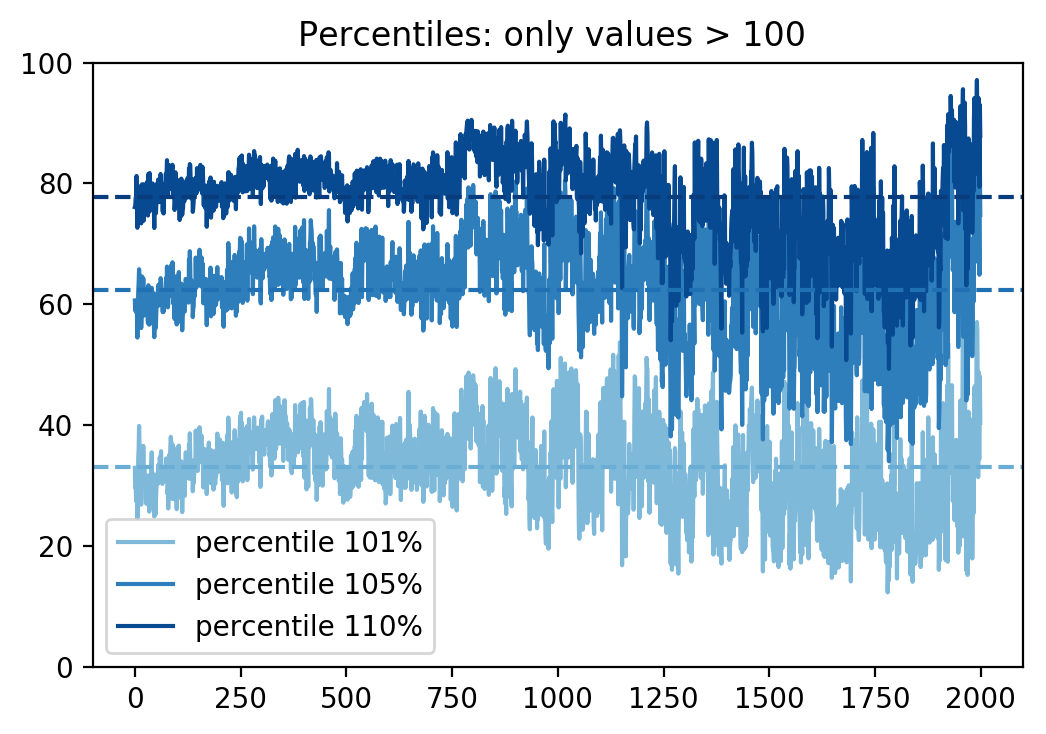

In [14]:
cmap = plt.cm.get_cmap('Blues')

plt.plot(percent['phigh101'],label='percentile 101%', color=cmap(0.45))
plt.plot(percent['phigh105'],label='percentile 105%', color=cmap(0.7))
plt.plot(percent['phigh110'],label='percentile 110%', color=cmap(0.9))

plt.axhline(np.nanmean(percent['phigh101']), color=cmap(0.5), linestyle='--')
plt.axhline(np.nanmean(percent['phigh105']), color=cmap(0.75), linestyle='--')
plt.axhline(np.nanmean(percent['phigh110']), color=cmap(0.95), linestyle='--')

plt.legend()
plt.ylim(0,100)
plt.title('Percentiles: only values > 100 ')

Text(0.5,1,'Percentiles: only values < 0 ')

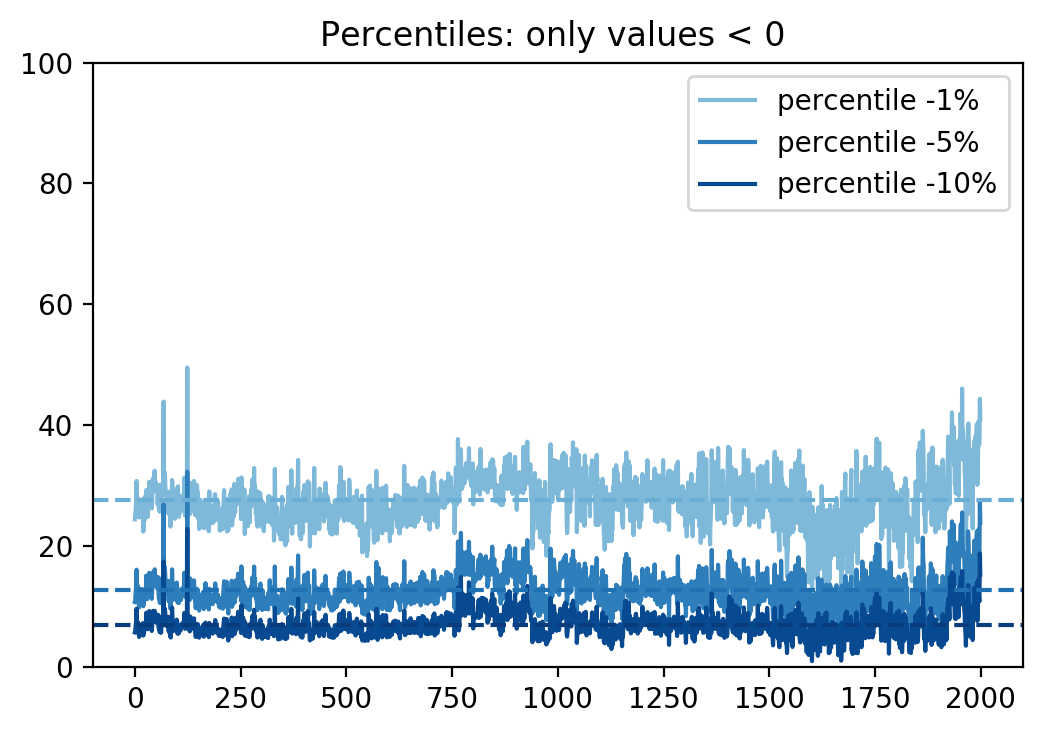

In [19]:
cmap = plt.cm.get_cmap('Blues')

plt.plot(percent['plow_1'],label='percentile -1%', color=cmap(0.45))
plt.plot(percent['plow_5'],label='percentile -5%', color=cmap(0.7))
plt.plot(percent['plow_10'],label='percentile -10%', color=cmap(0.9))

plt.axhline(np.nanmean(percent['plow_1']), color=cmap(0.5), linestyle='--')
plt.axhline(np.nanmean(percent['plow_5']), color=cmap(0.75), linestyle='--')
plt.axhline(np.nanmean(percent['plow_10']), color=cmap(0.95), linestyle='--')

plt.legend()
plt.ylim(0,100)
plt.title('Percentiles: only values < 0 ')

Text(0.5,1,'Overall percentiles')

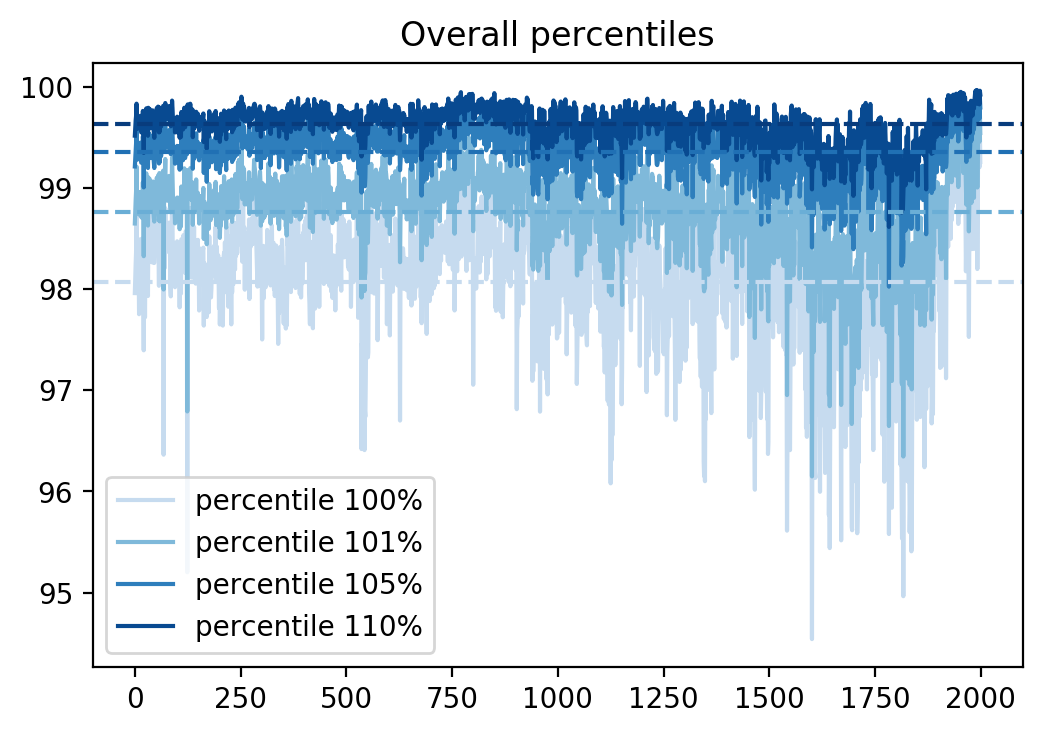

In [20]:
cmap = plt.cm.get_cmap('Blues')

plt.plot(percent['p100'],label='percentile 100%', color=cmap(0.25))
plt.plot(percent['p101'],label='percentile 101%', color=cmap(0.45))
plt.plot(percent['p105'],label='percentile 105%', color=cmap(0.7))
plt.plot(percent['p110'],label='percentile 110%', color=cmap(0.9))

plt.axhline(np.nanmean(percent['p100']), color=cmap(0.25), linestyle='--')
plt.axhline(np.nanmean(percent['p101']), color=cmap(0.5), linestyle='--')
plt.axhline(np.nanmean(percent['p105']), color=cmap(0.75), linestyle='--')
plt.axhline(np.nanmean(percent['p110']), color=cmap(0.95), linestyle='--')

plt.legend()
#plt.ylim(0,100)
plt.title('Overall percentiles')

Text(0.5,1,'Overall percentiles')

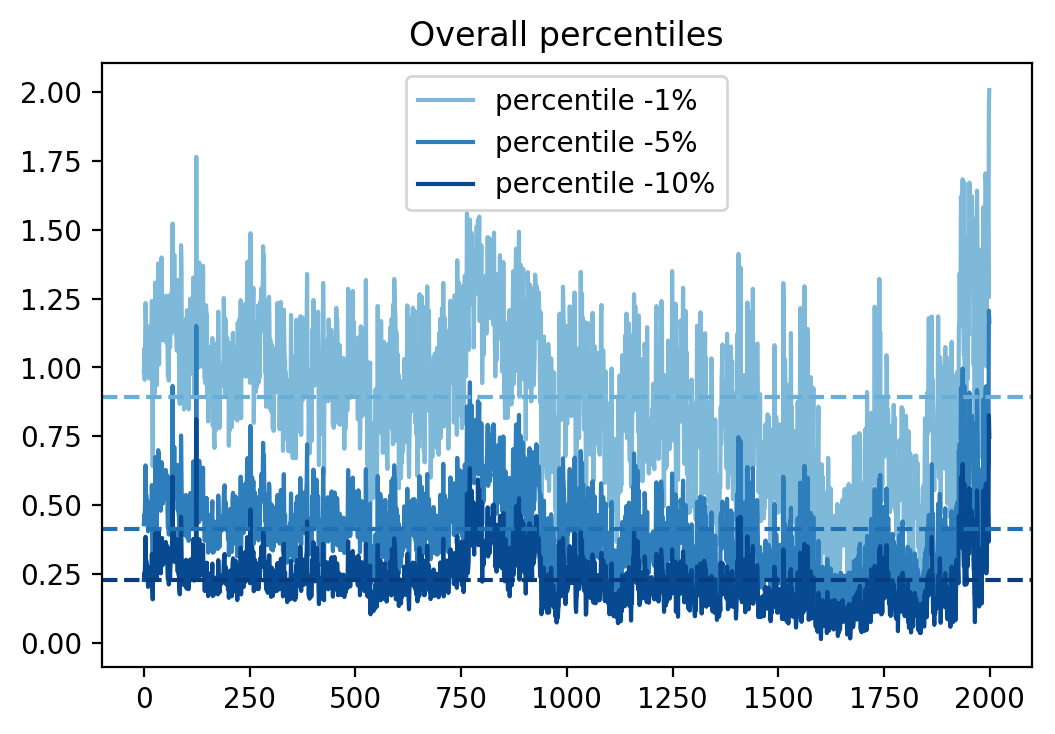

In [22]:
cmap = plt.cm.get_cmap('Blues')

#plt.plot(percent['p0'],label='percentile 0%', color=cmap(0.25))
plt.plot(percent['p_1'],label='percentile -1%', color=cmap(0.45))
plt.plot(percent['p_5'],label='percentile -5%', color=cmap(0.7))
plt.plot(percent['p_10'],label='percentile -10%', color=cmap(0.9))

plt.axhline(np.nanmean(percent['p_1']), color=cmap(0.5), linestyle='--')
plt.axhline(np.nanmean(percent['p_5']), color=cmap(0.75), linestyle='--')
plt.axhline(np.nanmean(percent['p_10']), color=cmap(0.95), linestyle='--')

plt.legend()
#plt.ylim(0,100)
plt.title('Overall percentiles')

Text(0.5,1,'Overall percentiles')

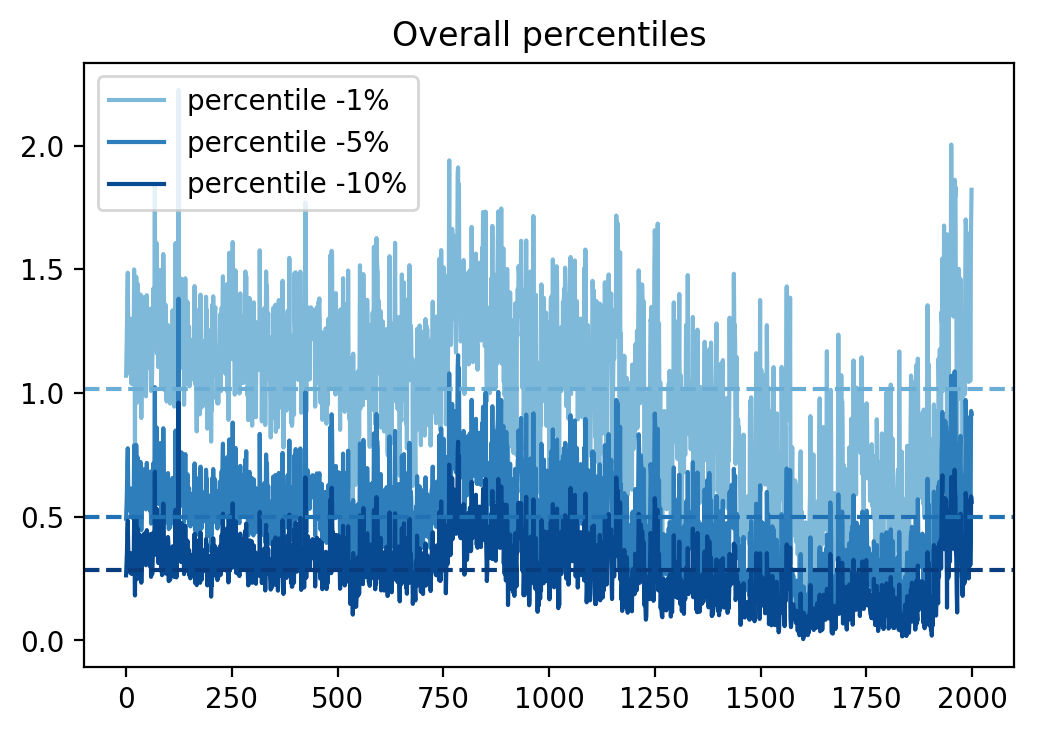

In [23]:
cmap = plt.cm.get_cmap('Blues')

#plt.plot(percentiles['p0'],label='percentile 0%', color=cmap(0.25))
plt.plot(percentiles['p_1'],label='percentile -1%', color=cmap(0.45))
plt.plot(percentiles['p_5'],label='percentile -5%', color=cmap(0.7))
plt.plot(percentiles['p_10'],label='percentile -10%', color=cmap(0.9))

plt.axhline(np.nanmean(percentiles['p_1']), color=cmap(0.5), linestyle='--')
plt.axhline(np.nanmean(percentiles['p_5']), color=cmap(0.75), linestyle='--')
plt.axhline(np.nanmean(percentiles['p_10']), color=cmap(0.95), linestyle='--')

plt.legend()
#plt.ylim(0,100)
plt.title('Overall percentiles')

In [22]:
test = sic_lalo_allit_ccsm4[0,ccsm4_truth_lat[:,0]>0,:,0]
test.shape

(46, 180)

In [27]:
(test>95.0).shape

(46, 180)

In [32]:
count,values = np.histogram(test[(test>95.0)])

In [50]:
count, values

(array([ 28,  50,  62,  80, 147, 264, 187,  77,  13,   1]),
 array([95.00956888, 95.41376774, 95.8179666 , 96.22216545, 96.62636431,
        97.03056317, 97.43476203, 97.83896089, 98.24315975, 98.64735861,
        99.05155746]))

In [54]:
p95 = np.percentile(test[(test>95.0)],95)
p5 = np.percentile(test[(test>95.0)],5)
p95

97.95294179179206

In [43]:
diff = values[1]-values[0]
x_axis = (values+diff)[:-1]

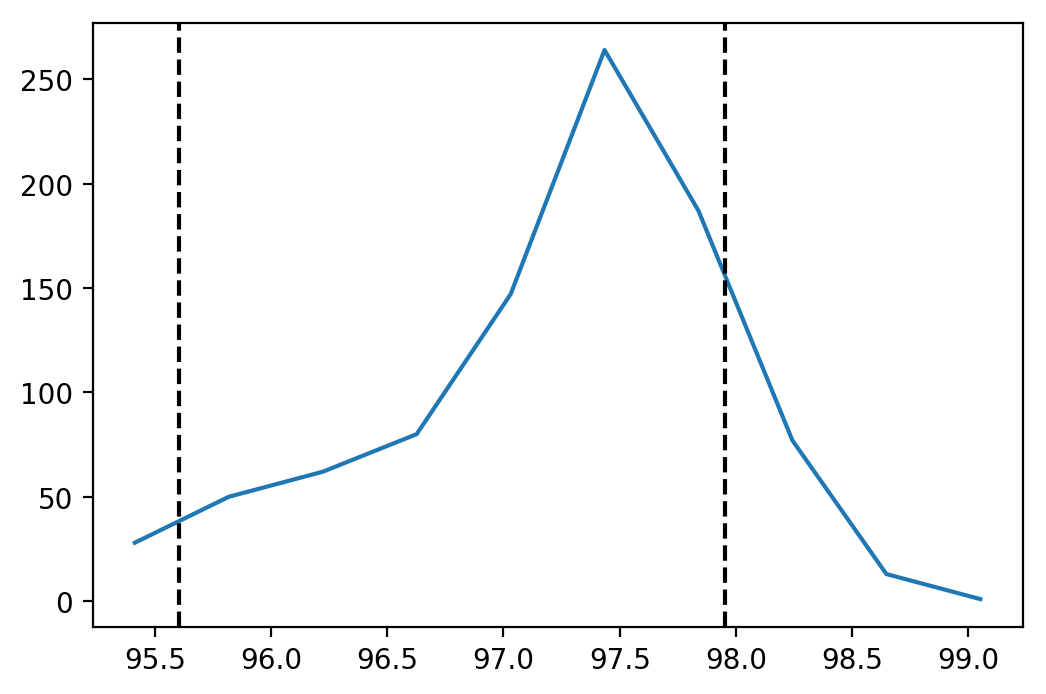

In [49]:
plt.plot(x_axis,count)
plt.axvline(p5, color='k', linestyle='--')
plt.axvline(p95, color='k', linestyle='--')

In [53]:
from scipy import stats
percentile98 = stats.percentileofscore(test[(test>95.0)],98)
percentile98

95.7095709570957

In [56]:
percentile100 = stats.percentileofscore(test[(test>95.0)],100)
percentile100

100.0

## Load prior: 

In [13]:
[ccsm4_truth_tas, ccsm4_truth_sic, 
 ccsm4_truth_sit,
 ccsm4_truth_lat, ccsm4_truth_lon] = load_ccsm4_lm_regridded()

ccsm4_truth_time = np.arange(850,1851,1)

In [ ]:
[sia_nh_ccsm4_truth, sie_nh_ccsm4_truth, 
 sia_nh_ccsm4_truth_anom, sie_nh_ccsm4_truth_anom,
 sia_sh_ccsm4_truth, sie_sh_ccsm4_truth, 
 sia_sh_ccsm4_truth_anom, 
 sie_sh_ccsm4_truth_anom] = ce_utils.calc_lm_tot_si(ccsm4_truth_sic,ccsm4_truth_lat, 
                                                    ccsm4_truth_time, anom_start, anom_end)